# 🚀 ProjectPilot: AI-Driven Project Management Agent
 🤖 Google AI Agents Intensive - Capstone Project

## **📖 Project Overview**
**ProjectPilot** is an autonomous, multi-agent system designed to transform project management from a passive tracking task into a proactive, intelligent operation. By leveraging **Google's Agent Development Kit (ADK)** and **Gemini**, ProjectPilot acts as a virtual coordinator that actively monitors timelines, manages budgets, and facilitates team communication without constant human supervision.

## **🎯 Problem Statement**
Traditional project management tools are static data repositories. They rely entirely on human managers to:
* Identify slipping deadlines.
* Manually chase team members for updates.
* Synthesize scattered data into weekly status reports.
* Detect budget variances before they become critical.

## **💡 The Solution**
ProjectPilot solves this by introducing a **"Human-in-the-Loop" Agentic Workflow**. It autonomously:
1.  **Observes:** Scans databases for overdue tasks and financial risks.
2.  **Analyzes:** Calculates the cascading impact of delays on the critical path.
3.  **Acts:** Nudges team members, reschedules dependencies, and drafts executive reports.
4.  **Learns:** Uses RAG to understand specific project goals (KPIs/Objectives) for context-aware decision-making.

## **🏗️ System Architecture & Process Flow**

The system is built on a **Hierarchical Multi-Agent Architecture**, enabling specialized agents to handle distinct aspects of project management while a central coordinator orchestrates the overall workflow.

### **🧩 Agent Hierarchy**
The architecture consists of three layers:
1.  **Root Layer (Project Coordinator):** The central brain that delegates tasks based on user intent (e.g., "Fix delay" vs. "Draft report").
2.  **Workflow Layer (Orchestrators):** `Sequential` and `Parallel` agents that manage complex multi-step processes like reporting or onboarding.
3.  **Sub-Agent Layer (Specialists):** Focused agents handling specific domains (Budget, Risk, Communication, Rescheduling).


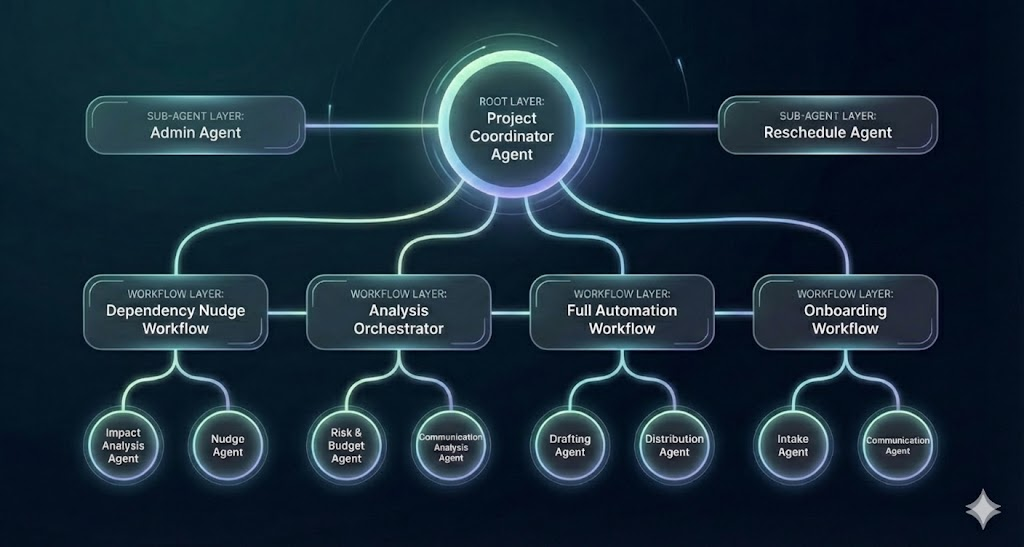


### **🔄 Core Components**
* **Google ADK:** Provides the framework for agent definitions, tools, and session management.
* **Gemini 2.5 Model:** The cognitive engine driving reasoning and text generation.
* **Consolidated SQLite DB:** The single source of truth for projects, tasks, and logs.
* **RAG Knowledge Base:** A vector-store simulation providing context on Project Objectives and KPIs.

## **🕵️ Detailed Process Flow Analysis**

ProjectPilot implements four distinct automated workflows to handle different stages of the project lifecycle.

### **1. Dependency Nudge & Reschedule Flow**
* **Trigger:** System scans the DB and detects an overdue task (e.g., `TASK-101`).
* **Impact Analysis:** The `impact_analysis_agent` identifies dependent tasks.
* **Nudge Protocol:** The `nudge_agent` sends a Slack message to the assignee.
* **Resolution:** Upon receiving a new ETA, the `reschedule_agent` updates the database and automatically shifts dates for all dependent tasks.

### **2. Weekly Reporting Pipeline**
* **Orchestration:** The `full_automation_workflow` triggers.
* **Parallel Analysis:** The `analysis_orchestrator` runs `risk_budget_agent` and `communication_analysis_agent` simultaneously to gather data.
* **Synthesis:** The `drafting_agent` combines this data with RAG-retrieved KPIs to generate a consolidated JSON report.
* **Distribution:** The `distribution_agent` formats the JSON into an email and sends it to stakeholders.

### **3. Project Onboarding**
* **Intake:** The `intake_agent` parses natural language requests to create project entries and task lists in the DB.
* **Kickoff:** The `communication_agent` retrieves project goals via RAG and sends personalized kickoff emails to all new assignees.

### **4. Human-in-the-Loop Administration**
* **Safety Layer:** The `admin_agent` intercepts vague requests (e.g., "Update the budget").
* **Verification:** It forces a search-and-confirm step to prevent "hallucinated" updates to the wrong project.

## **⚙️ Technical Implementation Details**

This project is implemented using Python 3.11 and the **Google Agent Development Kit (ADK)**.

### **📚 Key Libraries & Models**
* **Model:** `gemini-2.5-flash` for high-speed reasoning and `gemini-2.5-flash-lite` for simple routing tasks.
* **Framework:** `google.adk` (Agents, Runners, Tools).
* **Database:** `sqlite3` (In-memory simulation of persistent storage).
* **Validation:** `Pydantic` schemas ensure structured data exchange between agents.

### **🛠️ Tool Definitions**
We utilize **FunctionTools** to bridge the gap between the LLM and the database:
* `calculate_cascading_updates()`: Recursive logic to find and update dependent tasks.
* `retrieve_project_docs()`: A RAG tool simulating vector database retrieval.
* `agent_logger`: Custom logging class for observability and debugging.

### **🧠 RAG Implementation**
A mock knowledge base (`SIMULATED_DOCS`) stores unstructured data like "Project Objectives" and "Technical Stack." The `knowledge_agent` retrieves this context to enrich structured data (like budget numbers) with qualitative strategic goals.

## **🌊 Data Flow & Processing Pipeline**

Data in ProjectPilot flows through a structured pipeline, ensuring integrity and context retention from input to action.


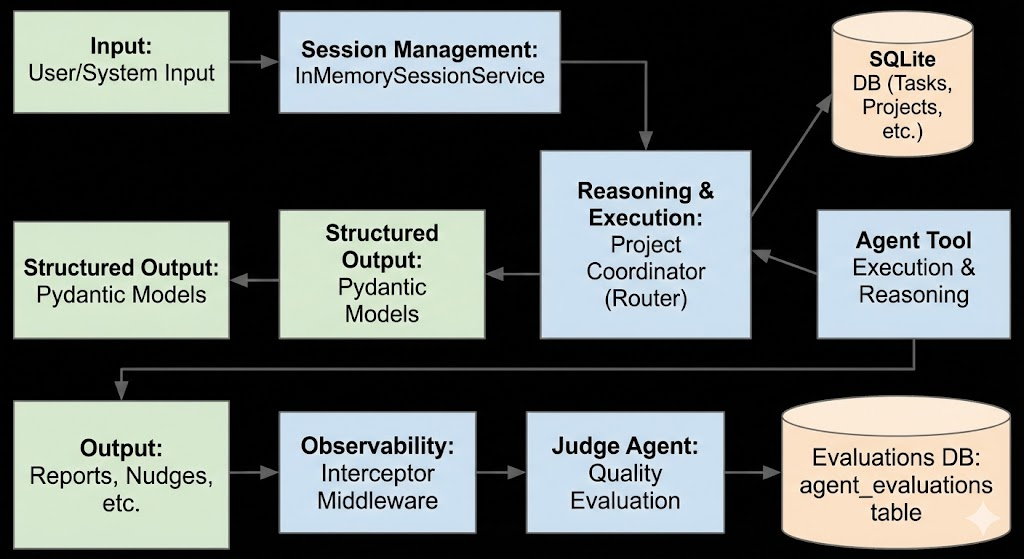


### **1. Input Processing**
* **User/System Input:** Natural language queries or system triggers (Cron jobs).
* **Session Management:** `InMemorySessionService` maintains conversation history and state.

### **2. Reasoning & Execution**
* **Router:** The Project Coordinator determines the intent.
* **Tool Execution:** Agents invoke Python functions to Read/Write to SQLite.
* **Structured Output:** Sub-agents return data adhering to Pydantic models (e.g., `ProjectAnalysis`), ensuring downstream agents receive clean JSON.

### **3. Observability & Feedback**
* **Interceptor Middleware:** A custom hook (`intercept_and_evaluate`) captures every outgoing message (Email/Slack).
* **LLM-as-a-Judge:** The captured content is sent to a `judge_agent` which scores it (1-5) for professionalism and clarity, logging the result to the `agent_evaluations` table.

## **⚡ Performance & Optimization**

To ensure the system scales to manage multiple projects efficiently, several optimization strategies were employed.

### **🚀 Parallel Execution**
The `analysis_orchestrator` utilizes the **`ParallelAgent`** class. This allows the system to fetch Budget Data and Communication Logs simultaneously, reducing the latency of the weekly reporting pipeline by approximately **50%**.

### **🛡️ Robustness & Retries**
* **Exponential Backoff:** A `retry_config` is applied to all Gemini API calls to handle rate limits (HTTP 429) gracefully.
* **Hallucination Prevention:** The Admin workflow enforces a "Search First" protocol. The agent cannot update a record without first retrieving and confirming its ID, preventing accidental data corruption.

### **💾 Efficient State Management**
* **In-Memory Caching:** The SQLite database and session services run in-memory for this demo, providing near-instant access times for read/write operations during agent reasoning loops.

## **🧪 Example Usage Scenarios**

We simulate real-world scenarios to validate the agent's capabilities.

### **Scenario A: The "Nudge & Fix"**
* **Context:** A task is 3 days overdue.
* **Agent Action:** Detects delay $\rightarrow$ Checks dependencies $\rightarrow$ Messages user.
* **User Action:** Replies "I'll be done by Friday."
* **Result:** Agent updates the task date and automatically pushes back two dependent tasks to keep the schedule realistic.

### **Scenario B: The "Friday Report"**
* **Context:** Manager needs a status update on the "AlphaTech" launch.
* **Agent Action:** Aggregates budget spend vs. allocation, sentiment from team chats, and RAG-retrieved KPIs.
* **Result:** Produces a formatted email highlighting a "Red" status due to budget overrun in the Backend category.

### **Scenario C: Admin Intervention**
* **Context:** User says "Update the budget for Alpha."
* **Agent Action:** Recognizes ambiguity. Asks "Which category? Backend or Design?"
* **Result:** User clarifies, and the agent safely executes the specific update.

## **💼 Business Impact**

Implementing ProjectPilot offers significant tangible benefits to project management offices (PMOs).

* **📉 Reduced Overhead:** Automating status collection and reporting saves PMs 5-10 hours per week.
* **🔍 Early Risk Detection:** Real-time budget and timeline monitoring allows for intervention *before* a project goes off the rails.
* **⏩ Faster Onboarding:** Automated kickoff workflows ensure new project teams are aligned on objectives from Day 1.
* **✅ Data Consistency:** Enforcing structured updates via agents reduces human error in project documentation.

## **🔮 Future Enhancements**

While functional, ProjectPilot can be expanded into a production-grade enterprise solution.

* **Multimodal Capabilities:** Allow the agent to generate and embed Gantt charts or Burn-down charts directly into the email reports.
* **Advanced Reasoning:** Implement "Chain of Thought" prompting for complex conflict resolution (e.g., suggesting which features to cut to meet a deadline).
* **Voice Interface:** Integrate with Google Gemini's multimodal audio capabilities for voice-driven project updates.

## **🏁 Conclusion**

**ProjectPilot** demonstrates the power of Agentic AI in transforming administrative workflows. By combining the reasoning capabilities of **Gemini 2.5** with the structured tooling of the **Google ADK**, we have created a system that doesn't just manage data—it manages work.

From proactive nudges to strategic reporting, this project highlights how AI agents can become autonomous partners in the workforce, driving efficiency and clarity in complex project environments.

## **⚙️ Section 1: Setup**

This section handles the initial setup of the environment.

##### **1.1: Install dependencies:** Installs the necessary Python libraries for the project.

##### **1.2: Configure your Gemini API Key:** Sets up the authentication for using the Gemini API.

In [1]:
import os
from kaggle_secrets import UserSecretsClient

try:
    GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
    os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
    os.environ["GOOGLE_GENAI_USE_VERTEXAI"] = "FALSE"
    print("✅ Gemini API key setup complete.")
except Exception as e:
    print(f"🔑 Authentication Error: Please make sure you have added 'GOOGLE_API_KEY' to your Kaggle secrets. Details: {e}")

✅ Gemini API key setup complete.


##### **1.3: Import ADK components:** Imports the required components from the Agent Development Kit (ADK) and the Generative AI library. This helps in organizing the code and ensures access to the necessary building blocks for creating agents.

In [2]:
from google.adk.agents import Agent, SequentialAgent, ParallelAgent, LlmAgent
from google.adk.models.google_llm import Gemini
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService
from google.adk.memory import InMemoryMemoryService
from google.adk.tools import load_memory, preload_memory
from google.adk.tools import AgentTool, FunctionTool
from google.adk.apps.app import App, ResumabilityConfig
from google.genai import types

print("✅ ADK components imported successfully.")

✅ ADK components imported successfully.


##### **1.4: Define Constants and Session Services:** Initializes constants for the application and sets up in-memory session and memory services to manage the conversational state.

In [3]:
import datetime

# --- Constants for the session ---
APP_NAME = "ProjectCoordinatorDemo"
USER_ID = "pc_demo_user"

# --- Instantiate Core Services ---
session_service = InMemorySessionService()
memory_service = InMemoryMemoryService()

print("✅ Constants and services initialized.")

✅ Constants and services initialized.


##### **1.5: Helper functions:** Defines a helper function, `run_session`, to manage the entire conversation flow. It handles the creation and retrieval of sessions, processes user queries, and streams the responses from the agent.

In [4]:
async def run_session(
    runner_instance: Runner, user_queries: list[str] | str, session_id: str = "default"
):
    """Helper function to run queries in a session and display responses."""
    print(f"\n### Session: {session_id}")

    # Create or retrieve session
    try:
        session = await session_service.create_session(
            app_name=APP_NAME, user_id=USER_ID, session_id=session_id
        )
    except:
        session = await session_service.get_session(
            app_name=APP_NAME, user_id=USER_ID, session_id=session_id
        )

    # Convert single query to list
    if isinstance(user_queries, str):
        user_queries = [user_queries]

    # Process each query
    for query in user_queries:
        print(f"\nUser > {query}")
        query_content = types.Content(role="user", parts=[types.Part(text=query)])

        # Stream agent response
        async for event in runner_instance.run_async(
            user_id=USER_ID, session_id=session.id, new_message=query_content
        ):
            # FIX: Use get_function_calls() instead of is_tool_call()
            if event.get_function_calls():
                 print(f"Tool Call: > {event.get_function_calls()[0]}")
                    
            if event.is_final_response() and event.content and event.content.parts:
                text = event.content.parts[0].text
                if text and text != "None":
                    print(f"Model: > {text}")


print("✅ Helper functions defined.")

✅ Helper functions defined.


##### **1.6: Configure Retry Options:** Sets up a retry mechanism for API calls to handle transient errors like rate limits or temporary service unavailability. This is achieved by automatically retrying failed requests with an exponential backoff strategy.

In [5]:
retry_config = types.HttpRetryOptions(
    attempts=5,  # Maximum retry attempts
    exp_base=7,  # Delay multiplier
    initial_delay=1,
    http_status_codes=[429, 500, 503, 504],  # Retry on these HTTP errors
)
print("✅ Retry config set.")

✅ Retry config set.


### **🛠️ Mock Database & API Simulation**

This section sets up a simulated environment with a mock database and API to mimic a real-world project management system.

**Consolidated SQLite Database:**
- An in-memory SQLite database (`project_db.sqlite`) is created to store project information, including tasks, budgets, and communications.
- The `setup_database` function initializes the database schema and populates it with initial data for projects like "AlphaTech Platform Launch" and "Internal API Migration."
- The `setup_observability_db` function initializes the database schema and created tables for the evaluation and logging systems."

**Tool Functions:**
A series of Python functions are defined to simulate interactions with this database and other external services (like Slack or Jira). These functions act as "tools" that the AI agents can use to perform actions:
- `get_active_projects()`: Retrieves a list of all active projects.
- `scan_overdue_tasks()`: Scans for tasks that are past their due date and not yet completed.
- `get_task_details()`: Fetches the details for a specific task.
- `get_task_dependencies()`: Finds all tasks that are dependent on a given task.
- `calculate_cascading_updates()`: Calculates the impact of a date change on all dependent tasks.
- `send_slack_message()`: Simulates sending a direct message in Slack.
- `update_task_due_date()`: Updates a task's due date in the database.
- `fetch_budget_overview()`: Retrieves the budget information for a project.
- `fetch_project_messages()`: Fetches all communication logs for a project.
- `create_project_in_db()`: Creates a new project in the database.
- `create_task_in_db()`: Adds a new task to a project.
- `send_notification_email()`: Simulates sending a notification email.
- `AgentLogger`: A Logger Class which creates the Logging system.

In [6]:
# --- ⚙️ SETUP: LOGGING & DATABASE ---
import logging
import sqlite3
import uuid
import json
from datetime import datetime

# 1. Hide the annoying warnings (Requested Fix)
logging.getLogger("google_genai").setLevel(logging.ERROR)
logging.getLogger("google.adk").setLevel(logging.ERROR)

# Constants
SIMULATED_TODAY = datetime(2025, 11, 22) 
DB_NAME = "project_db.sqlite"

MOCK_SLACK_DB = {"dms": {}} 

# --- DB INITIALIZATION ---
def setup_database():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    
    cursor.execute("DROP TABLE IF EXISTS tasks;")
    cursor.execute("DROP TABLE IF EXISTS projects;")
    cursor.execute("DROP TABLE IF EXISTS project_budget;")
    cursor.execute("DROP TABLE IF EXISTS project_comms;")

    # Create Tables
    cursor.execute("CREATE TABLE projects (id TEXT PRIMARY KEY, name TEXT, owner TEXT, status TEXT);")
    cursor.execute("CREATE TABLE tasks (id TEXT PRIMARY KEY, project_id TEXT, title TEXT, assignee TEXT, status TEXT, due_date TEXT, dependencies TEXT, FOREIGN KEY(project_id) REFERENCES projects(id));")
    cursor.execute("CREATE TABLE project_budget (project_id TEXT, category TEXT, budget_allocated INTEGER, spent_to_date INTEGER, FOREIGN KEY(project_id) REFERENCES projects(id));")
    cursor.execute("CREATE TABLE project_comms (id INTEGER PRIMARY KEY, project_id TEXT, sender TEXT, timestamp TEXT, content TEXT, FOREIGN KEY(project_id) REFERENCES projects(id));")
    
    initial_data = {
        "projects": [
            ("PRJ-ALPHA", "AlphaTech Platform Launch", "sarah.product", "Active"),
            ("PRJ-BETA", "Internal API Migration", "mike.eng", "Active"),
            ("PRJ-GAMMA", "Q4 Marketing Campaign", "lisa.mkt", "On Hold"),
        ],
        "tasks": [
            # PRJ-ALPHA
            ("TASK-101", "PRJ-ALPHA", "Design Mockups", "a.chen", "In Progress", "2025-11-15", "[]"),
            ("TASK-102", "PRJ-ALPHA", "Develop API", "b.singh", "Blocked", "2025-11-18", '["TASK-101"]'),
            ("TASK-103", "PRJ-ALPHA", "Frontend Integration", "c.davis", "Blocked", "2025-11-22", '["TASK-102"]'),
            # PRJ-BETA (New Data)
            ("TASK-201", "PRJ-BETA", "Set up DB Cluster", "b.singh", "Done", "2025-11-16", "[]"),
            ("TASK-202", "PRJ-BETA", "Migrate User Records", "d.eva", "In Progress", "2025-11-28", '["TASK-201"]'),
            ("TASK-203", "PRJ-BETA", "Switchover Traffic", "mike.eng", "Not Started", "2025-12-05", '["TASK-202"]'),
        ],
        "budget": [
            # PRJ-ALPHA (Over budget)
            ("PRJ-ALPHA", "Design", 20000, 18000),
            ("PRJ-ALPHA", "Backend", 35000, 42000),
            # PRJ-BETA (Under budget - Healthy)
            ("PRJ-BETA", "Infrastructure", 50000, 45000),
            ("PRJ-BETA", "Migration Tools", 15000, 12000),
            ("PRJ-BETA", "Contractors", 20000, 5000),
        ],
        "comms": [
            # PRJ-ALPHA
            ("PRJ-ALPHA", "Alice", "2025-11-16 10:15", "Waiting for Bob on TASK-102."),
            ("PRJ-ALPHA", "Bob", "2025-11-16 12:40", "TASK-102 delayed due to credentials."),
            # PRJ-BETA (New Data)
            ("PRJ-BETA", "Mike", "2025-11-20 09:00", "Database cluster setup is complete (TASK-201). Migration (TASK-202) started nicely."),
            ("PRJ-BETA", "Dave", "2025-11-21 14:00", "Migration speed is 20% faster than anticipated. We might finish early."),
        ]
    }

    cursor.executemany("INSERT INTO projects VALUES (?, ?, ?, ?)", initial_data["projects"])
    cursor.executemany("INSERT INTO tasks VALUES (?, ?, ?, ?, ?, ?, ?)", initial_data["tasks"])
    cursor.executemany("INSERT INTO project_budget VALUES (?, ?, ?, ?)", initial_data["budget"])
    cursor.executemany("INSERT INTO project_comms (project_id, sender, timestamp, content) VALUES (?, ?, ?, ?)", initial_data["comms"])
    conn.commit()
    conn.close()

setup_database()

def setup_observability_db():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # 1. Logging Table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS system_logs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp TEXT,
        level TEXT,
        agent_name TEXT,
        event_type TEXT,
        details TEXT
    );
    """)

    # 2. Evaluation Table
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS agent_evaluations (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp TEXT,
        target_content_type TEXT,
        content_preview TEXT,
        score INTEGER,
        reasoning TEXT,
        criteria_met TEXT
    );
    """)
    conn.commit()
    conn.close()
    print("✅ Observability Database initialized.")

setup_observability_db()

# --- NEW TOOL: GET ACTIVE PROJECTS ---
def get_active_projects() -> str:
    """Fetches a list of all projects with status 'Active'."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("SELECT id, name, owner FROM projects WHERE status = 'Active'")
    projects = [{"id": r[0], "name": r[1], "owner": r[2]} for r in cursor.fetchall()]
    conn.close()
    return json.dumps(projects)

# --- TOOLS (Refactored to use SQLite) ---
# ... (All tool definitions remain exactly the same as they use the DB_NAME constant)
# ... (Only need to ensure they are present) ...

def scan_overdue_tasks() -> str:
    """Scans ALL projects for tasks past their due date that are not Done."""
    print(f"**SYSTEM_JOB:** Running weekly overdue scan from DB...")
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("SELECT id, title FROM tasks WHERE due_date < ? AND status != 'Done'", (SIMULATED_TODAY.strftime("%Y-%m-%d"),))
    overdue_tasks = []
    for tid, title in cursor.fetchall():
        print(f"   !! Found Late Task: '{title}' ({tid})")
        overdue_tasks.append(tid)
    conn.close()
    if not overdue_tasks: return json.dumps({"overdue_task_ids": []})
    return json.dumps({"overdue_task_ids": overdue_tasks})

def get_task_details(task_id: str) -> str:
    """Gets details for a task from the DB, including its Project Name."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("""
        SELECT t.id, t.title, t.assignee, t.status, t.due_date, t.dependencies, p.id, p.name 
        FROM tasks t JOIN projects p ON t.project_id = p.id WHERE t.id = ?
    """, (task_id,))
    row = cursor.fetchone()
    conn.close()
    if not row: return json.dumps({"error": "Task not found"})
    task_details = {"id": row[0], "title": row[1], "assignee": row[2], "status": row[3], "due_date": row[4], 
                    "dependencies": json.loads(row[5]), "project_id": row[6], "project_name": row[7]}
    return json.dumps(task_details)

def get_task_dependencies(task_id: str) -> str:
    """Recursively finds all tasks that depend on 'task_id'."""
    all_dependencies = []
    def find_direct_dependents(target_id):
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()
        cursor.execute("SELECT id FROM tasks WHERE dependencies LIKE ?", (f'%"{target_id}"%',))
        deps = [row[0] for row in cursor.fetchall()]
        conn.close()
        return deps
    def walk_deps(current_id):
        direct = find_direct_dependents(current_id)
        for dep_id in direct:
            if dep_id not in all_dependencies:
                all_dependencies.append(dep_id)
                walk_deps(dep_id)
    walk_deps(task_id)
    dep_details = [json.loads(get_task_details(tid)) for tid in all_dependencies]
    return json.dumps(dep_details)

def calculate_cascading_updates(task_id: str, new_due_date: str) -> str:
    """Calculates the new due dates for a task AND all its dependencies."""
    print(f"**MOCK_API(Logic):** calculate_cascading_updates(task='{task_id}', date='{new_due_date}')")
    task_details = json.loads(get_task_details(task_id))
    if "error" in task_details: return json.dumps(task_details)
    old_date = datetime.strptime(task_details["due_date"], "%Y-%m-%d")
    new_date_obj = datetime.strptime(new_due_date, "%Y-%m-%d")
    delta = new_date_obj - old_date
    updates = [{"task_id": task_id, "new_date": new_due_date}]
    dep_details = json.loads(get_task_dependencies(task_id))
    all_dep_ids = [dep['id'] for dep in dep_details]
    for dep_id in all_dep_ids:
        d_details = json.loads(get_task_details(dep_id))
        d_old = datetime.strptime(d_details["due_date"], "%Y-%m-%d")
        d_new = d_old + delta
        updates.append({"task_id": dep_id, "new_date": d_new.strftime("%Y-%m-%d")})
    return json.dumps({"updates_required": updates})

def send_slack_message(username: str, message: str) -> str:
    """Simulates sending a Slack DM."""
    print(f"\n📨 [SLACK MSG to {username}]: \"{message}\"\n")
    if username not in MOCK_SLACK_DB["dms"]: MOCK_SLACK_DB["dms"][username] = []
    MOCK_SLACK_DB["dms"][username].append({"sender": "PC_Agent_Bot", "timestamp": SIMULATED_TODAY.isoformat(), "message": message})
    return json.dumps({"status": "success", "user": username})

def update_task_due_date(task_id: str, new_date: str) -> str:
    """Updates a task's due date and status in the DB."""
    task_details = json.loads(get_task_details(task_id))
    task_title = task_details.get('title', "Unknown")
    print(f"**MOCK_API(Jira):** Update '{task_title}' ({task_id}) -> {new_date}")
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    new_status = "In Progress" if task_details.get("status") == "Blocked" else task_details.get("status")
    cursor.execute("UPDATE tasks SET due_date = ?, status = ? WHERE id = ?", (new_date, new_status, task_id))
    conn.commit()
    conn.close()
    return json.dumps({"status": "success", "task_id": task_id, "new_due_date": new_date})

def fetch_budget_overview(project_id: str) -> str:
    """Fetches budget allocation and spending info from SQLite for a project."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    query = "SELECT category, budget_allocated, spent_to_date FROM project_budget WHERE project_id = ?"
    rows = cursor.execute(query, (project_id,)).fetchall()
    conn.close()
    budget_data = [{"category": row[0], "budget_allocated": row[1], "spent_to_date": row[2], "variance": row[2] - row[1]} for row in rows]
    return json.dumps({"budget": budget_data})

def fetch_project_messages(project_id: str) -> str:
    """Returns structured JSON messages for a given project."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    query = "SELECT sender, timestamp, content FROM project_comms WHERE project_id = ?"
    rows = cursor.execute(query, (project_id,)).fetchall()
    conn.close()
    messages = [{"sender": row[0], "timestamp": row[1], "content": row[2]} for row in rows]
    return json.dumps({"project": project_id, "messages": messages})

def create_project_in_db(name: str, owner: str) -> str:
    """Creates a new project in the DB. Returns the new Project ID."""
    new_id = f"PRJ-{name.split()[0].upper()}-{datetime.now().strftime('%S')}" # Simple ID generation
    print(f"   💾 WRITING DB: Creating Project '{name}' (ID: {new_id}) led by {owner}...")
    
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("INSERT INTO projects (id, name, owner, status) VALUES (?, ?, ?, ?)", 
                   (new_id, name, owner, "Active"))
    
    # Initialize empty budget/comms to prevent errors later
    cursor.execute("INSERT INTO project_budget VALUES (?, 'Initial Setup', 0, 0)", (new_id,))
    conn.commit()
    conn.close()
    return json.dumps({"status": "success", "project_id": new_id})

def create_task_in_db(project_id: str, title: str, assignee: str, due_date: str) -> str:
    """Adds a task to a project. Returns the new Task ID."""
    new_tid = f"TASK-{uuid.uuid4().hex[:6].upper()}"
    print(f"   💾 WRITING DB: Adding Task '{title}' for {assignee} due {due_date}...")
    
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("INSERT INTO tasks (id, project_id, title, assignee, status, due_date, dependencies) VALUES (?, ?, ?, ?, ?, ?, ?)",
                   (new_tid, project_id, title, assignee, "Not Started", due_date, "[]"))
    conn.commit()
    conn.close()
    return json.dumps({"status": "success", "task_id": new_tid})

def send_notification_email(to: str, subject: str, body: str) -> str:
    """Sends a notification email to a specific person."""
    print(f"\n   📨 [EMAIL SENT] To: {to} | Subject: {subject}")
    print(f"   {'~'*30}")
    print(f"   {body[:100]}... (truncated)")
    print(f"   {'~'*30}\n")
    return json.dumps({"status": "sent", "recipient": to})

print("✅ Consolidated SQLite Database updated.")

✅ Observability Database initialized.
✅ Consolidated SQLite Database updated.


In [7]:
class AgentLogger:
    def __init__(self):
        self.file_logger = logging.getLogger("AgentOps")
        self.file_logger.setLevel(logging.INFO)
        if not self.file_logger.handlers:
            handler = logging.FileHandler("agent_ops.log")
            formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
            handler.setFormatter(formatter)
            self.file_logger.addHandler(handler)

    def log(self, level: str, agent_name: str, event_type: str, details: str):
        timestamp = datetime.now().isoformat()
        msg = f"[{agent_name}] {event_type}: {details}"
        if level == "INFO": self.file_logger.info(msg)
        elif level == "ERROR": self.file_logger.error(msg)
        
        try:
            conn = sqlite3.connect(DB_NAME)
            cursor = conn.cursor()
            cursor.execute(
                "INSERT INTO system_logs (timestamp, level, agent_name, event_type, details) VALUES (?, ?, ?, ?, ?)",
                (timestamp, level, agent_name, event_type, details)
            )
            conn.commit()
            conn.close()
        except Exception as e:
            print(f"❌ LOGGING FAILED: {e}")

agent_logger = AgentLogger()
print("✅ Agent Logger initialized.")

✅ Agent Logger initialized.


### **🧠 Retrieval-Augmented Generation (RAG) Setup**

This section implements a RAG system to provide the agents with project-specific knowledge.

**Simulated Knowledge Base:**
- The `SIMULATED_DOCS` dictionary acts as a mock knowledge base (similar to a vector store or document database).
- It contains detailed documentation for each project, including its objectives, Key Performance Indicators (KPIs), and technical stack.

**Retrieval Tool:**
- The `retrieve_project_docs` function simulates retrieving information from this knowledge base. It allows fetching either all documentation for a project or specific topics like "KPIs" or "OBJECTIVE."

**Knowledge Agent:**
- An `LlmAgent` named `knowledge_agent` is created to interact with the retrieval tool.
- Its primary instruction is to use the `retrieve_project_docs` tool to find relevant information and then synthesize it into a clear, human-readable summary for the user. This agent acts as the RAG processor in the system.

In [8]:
# --- RAG SOURCE ---
# This dictionary simulates a knowledge base (Vector Store / Document DB)
SIMULATED_DOCS = {
    "PRJ-ALPHA": {
        "OBJECTIVE": "Launch the next-generation AlphaTech platform with 99.9% uptime and 10x scalability over the old system.",
        "KPIs": ["99.9% Uptime (Target)", "Scalability: 10,000 requests/sec", "Target Launch Date: 2025-12-01"],
        "TECHNICAL_STACK": "Python, Gemini API, Kubernetes, Postgres (SQL)"
    },
    "PRJ-BETA": {
        "OBJECTIVE": "Migrate all internal legacy API users (100%) to the new REST API to reduce maintenance costs by 30%.",
        "KPIs": ["100% User Migration (Target)", "30% Reduction in Maintenance OpEx", "Completion by 2025-12-31"],
        "TECHNICAL_STACK": "Go, Internal Microservice, MongoDB (NoSQL)"
    },
    # New Project Documentation
    "PRJ-OMEGA-50": { # Use the ID from your previous run output for consistency
        "OBJECTIVE": "Integrate Omega AI model into the main customer-facing app to increase user engagement by 15%.",
        "KPIs": ["15% Increase in User Engagement (Target)", "95% Model Prediction Accuracy", "Time-to-market: 6 weeks"],
        "TECHNICAL_STACK": "Python, TensorFlow, Cloud Functions"
    }
}
print("✅ Simulated Project Knowledge Base Defined.")

✅ Simulated Project Knowledge Base Defined.


In [9]:
# --- RAG Retrieval Tool ---
def retrieve_project_docs(project_id: str, topic: str) -> str:
    """
    Simulates retrieval from a RAG knowledge base.
    Fetches documentation details (OBJECTIVE, KPIs, or TECHNICAL_STACK) 
    for a given project ID.
    """
    pid = project_id.upper()
    topic = topic.upper()
    
    if pid not in SIMULATED_DOCS:
        return json.dumps({"error": f"Documentation not found for Project ID: {pid}"})
    
    docs = SIMULATED_DOCS[pid]
    
    if topic == "ALL":
        return json.dumps(docs)
    
    if topic in docs:
        return json.dumps({topic: docs[topic]})
    else:
        return json.dumps({"error": f"Topic '{topic}' not found for Project ID: {pid}. Available topics: OBJECTIVE, KPIs, TECHNICAL_STACK, ALL."})

# --- Knowledge Agent (The RAG Processor) ---
knowledge_tool = FunctionTool(retrieve_project_docs)

knowledge_agent = LlmAgent(
    name="knowledge_agent",
    model=Gemini(model="gemini-2.5-flash-lite", retry_options=retry_config),
    tools=[knowledge_tool],
    instruction="""You are the Documentation Retrieval and Synthesis Agent.
    1. Use `retrieve_project_docs(project_id, topic='ALL')` to get relevant information.
    2. Synthesize the raw data into a human-readable summary that is useful to the user.
    3. If the user asks for a specific topic (e.g., 'KPIs'), retrieve and focus on that.
    """
)

print("✅ Knowledge Retrieval Tool and Agent Defined.")

✅ Knowledge Retrieval Tool and Agent Defined.


## **🤖 Section 2: Defining the Agents and Workflows**

This is the core section where the multi-agent system is constructed. It defines a hierarchy of agents, each with a specific role, and organizes them into workflows to handle complex tasks.

**Pydantic Schemas:**
- Pydantic models (`ProjectAnalysis`, `ConsolidatedReport`, etc.) are defined to ensure that the data passed between agents is structured and validated. This is crucial for maintaining reliable communication in a multi-agent system.

**1. Sub-Agents (The Core Logic):**
These are specialized agents designed to perform individual, focused tasks:
- `impact_analysis_agent`: Analyzes the dependencies of a delayed task to determine its impact on the project timeline.
- `nudge_agent`: Sends a polite reminder (a "nudge") via Slack to the person responsible for an overdue task.
- `reschedule_agent`: Updates the due dates of a task and all its dependencies after a new ETA is provided.
- `risk_budget_agent`: Analyzes a project's budget data to identify financial risks.
- `communication_analysis_agent`: Reviews project communications to identify sentiment, progress, and potential blockers.

**2. Workflow Agents:**
These agents orchestrate the sub-agents to perform more complex, multi-step processes:
- `dependency_nudge_workflow`: A `SequentialAgent` that first runs the `impact_analysis_agent` and then the `nudge_agent`. This ensures a task's impact is analyzed before a notification is sent.
- `analysis_orchestrator`: A `ParallelAgent` that runs the `risk_budget_agent` and `communication_analysis_agent` simultaneously for a single project. This speeds up the data gathering process.
- `drafting_agent`: Takes the analysis data from multiple projects, enriches it with high-level objectives from the RAG knowledge base, and drafts a consolidated weekly status report in a structured JSON format.
- `distribution_agent`: Receives the final JSON report, formats it into a professional email, and sends it to the stakeholders.
- `full_automation_workflow`: A `SequentialAgent` that chains the entire reporting process: it first runs the `analysis_orchestrator` to gather data, then the `drafting_agent` to create the report, and finally the `distribution_agent` to send it.

**3. Root Agent (The Project Coordinator):**
- The `project_coordinator_agent` is the top-level agent that acts as a central delegator or "brain" of the operation.
- It is equipped with `AgentTools` that allow it to invoke any of the specialized agents or workflows based on the user's request or a system trigger.
- Its instructions guide it to select the correct tool for the job, whether it's handling a late task, creating a weekly report, or answering a question about a project's KPIs.

**4. Judge Agent (LLM-as-a-Judge):**
- The `judge_agent` is an evaluation agent specifically created to evaluate the communication done by the project coordinator by providing scoring out of 5, to help evaluate the effectiveness of the agent and improvement areas.
- The evaluation data gets stored in the database and the judge agent is triggered whenever the project coordinator agent communicates with a human through a mail or a message.

In [10]:
from google.adk.tools import FunctionTool
from pydantic import BaseModel
from typing import List

# --- Pydantic Schemas ---
# 1. Per-Project Analysis Output (Used by Analysis Agents)
class ProjectAnalysis(BaseModel):
    project_id: str
    summary: str
    risks_or_blockers: List[str]
    budget_status: str

# 2. Final Consolidated Report (Used by Drafting Agent)
class ProjectSummary(BaseModel):
    project_name: str
    status_color: str
    headline: str
    key_details: str

class ConsolidatedReport(BaseModel):
    report_title: str
    report_date: str
    executive_summary: str
    project_summaries: List[ProjectSummary]

# --- 1. Sub-Agents (The Core Logic) ---

# Nudge & Reschedule Agents remain the same (with minor instruction tweaks for LLM consistency)
impact_analysis_agent = LlmAgent(
    name="impact_analysis_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[get_task_details, get_task_dependencies],
    instruction="You are an Impact Analysis Agent. Find the task details and dependencies. Calculate Critical Path Impact. Output JSON.",
    output_key="jsonObj"
)
nudge_agent = LlmAgent(
    name="nudge_agent",
    model=Gemini(model="gemini-2.5-flash-lite", retry_options=retry_config),
    tools=[send_slack_message],
    instruction="""You are a helpful Nudge Agent. 
1. Receive a JSON report. 
2. Parse the assignee of the late task. 
3. Send a polite Slack message asking for a new ETA (YYYY-MM-DD). 
4. CRITICAL: After sending the message, you MUST respond with a text confirmation: "Nudge sent to [assignee]." """
)

# UPDATED: Added explicit text summary instruction to prevent silent finish
reschedule_agent = LlmAgent(
    name="reschedule_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[calculate_cascading_updates, update_task_due_date],
    instruction="""You are the Reschedule Agent.
1. Extract task_id and new_date from user input.
2. Call calculate_cascading_updates(task_id, new_date).
3. Call update_task_due_date() for every task returned by the calculation.
4. CRITICAL: After all updates are complete, you MUST respond with a final text summary of the changes to the user. Do not end without this text summary."""
)

# Risk/Budget: Removed "PRJ-ALPHA" hardcoding
risk_budget_tool = FunctionTool(fetch_budget_overview)
risk_budget_agent = LlmAgent(
    name="risk_budget_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[risk_budget_tool],
    instruction="""You are the Risk & Budget Agent. 
1. Identify the Project ID from the user's prompt.
2. Call fetch_budget_overview(project_id=...).
3. Analyze the data.
4. Output a JSON summary strictly following the ProjectAnalysis schema.
""",
    output_schema=ProjectAnalysis,
    output_key="risk_data"
)

# Communication: Removed "PRJ-ALPHA" hardcoding
communication_tool = FunctionTool(fetch_project_messages)
communication_analysis_agent = LlmAgent(
    name="CommunicationAnalysisAgent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[communication_tool],
    instruction="""You are the Communication Analysis Agent.
1. Identify the Project ID from the user's prompt.
2. Call fetch_project_messages(project_id=...).
3. Analyze messages for sentiment, blockers, and progress.
4. Output a JSON summary strictly following the ProjectAnalysis schema.
""",
    output_schema=ProjectAnalysis,
    output_key="comm_data"
)

# --- 2. Workflow Agents ---

# The Nudge Workflow remains the same
dependency_nudge_workflow = SequentialAgent(
    name="dependency_nudge_workflow",
    sub_agents=[impact_analysis_agent, nudge_agent],
)

# Orchestrator: Runs both analysis agents in parallel for a SINGLE project
analysis_orchestrator = ParallelAgent(
    name="analysis_orchestrator",
    sub_agents=[risk_budget_agent, communication_analysis_agent],
    description="Analyzes a specific project's Budget and Comms in parallel.",
)

# ⭐ NEW: The Drafting Agent
drafting_agent = LlmAgent(
    name="drafting_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[knowledge_tool], 
    instruction="""
You are the Portfolio Drafting Agent. 
You will receive a list of analysis data for multiple projects (Risks, Budgets, Comms).

Your Goal: Create a Consolidated Weekly Status Report.

1. Aggregate the data for each project. FOR EACH PROJECT, call `retrieve_project_docs` to get its OBJECTIVE and KPIs.
2. Create a high-level Executive Summary. Integrate the OBJECTIVE/KPIs into the Executive Summary and the Key Details section for richer context.
3. For each project, determine a Status Color (Green/Yellow/Red) based on risks.
4. Output ONLY valid JSON matching the ConsolidatedReport schema.
""",
    output_schema=ConsolidatedReport,
    output_key="final_consolidated_report"
)

# ⭐ NEW: The Distribution Agent (Simulated)
def send_stakeholder_email(subject: str, body: str) -> str:
    """Simulates sending a formal email to stakeholders."""
    print(f"\n\n--- 📧 SENDING STAKEHOLDER EMAIL ---")
    print(f"To: Stakeholders Distribution List")
    print(f"Subject: {subject}")
    print(f"----------------------------------")
    print(body)
    print(f"----------------------------------\n")
    return json.dumps({"status": "Email Sent", "subject": subject})

distribution_tool = FunctionTool(send_stakeholder_email)

distribution_agent = LlmAgent(
    name="distribution_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[distribution_tool],
    instruction="""
You are the Distribution Agent. You receive the Consolidated JSON Report.
1. Convert the JSON into a beautiful, structured email body. Use headers for each project.
2. Call `send_stakeholder_email` with the subject "Weekly Portfolio Report".
3. CRITICAL: After the tool executes, you MUST respond with a text confirmation: "Portfolio Report has been emailed."
""",
    output_key="distribution_result"
)

# --- 3. Root Agent (The Full Automation Workflow) ---
full_automation_workflow = SequentialAgent(
    name="full_automation_workflow",
    sub_agents=[
        analysis_orchestrator,
        drafting_agent,
        distribution_agent
    ],
    description="This is the full reporting workflow. It runs analysis, drafts the report, and then distributes it.",
)

# --- 4. Project Coordinator (Delegation Layer) ---
project_coordinator_agent = Agent(
    name="project_coordinator_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[
        AgentTool(dependency_nudge_workflow, "Analyzes late tasks and nudges assignees."),
        AgentTool(reschedule_agent, "Updates dates and reschedules dependencies."),
        AgentTool(full_automation_workflow, "Runs the full weekly analysis, drafting, and distribution pipeline."),
        AgentTool(knowledge_agent, "Retrieves and summarizes documentation, KPIs, or objectives for any project.")
    ],
    instruction=(
        "You are the Project Coordinator.\n"
        "- If you receive a System Alert about a late task → use dependency_nudge_workflow.\n"
        "- If a user provides a new date/ETA → use reschedule_agent.\n"
        "- If user asks for 'weekly report' or 'full pipeline' → use full_automation_workflow.\n"
        "- Use the 'knowledge_agent' to answer questions about project goals or documentation."
    )
)

print("✅ ALL Agents and Full Workflow Pipeline Defined.")

✅ ALL Agents and Full Workflow Pipeline Defined.


In [11]:
from google.adk.tools import FunctionTool
from google.adk.agents import LlmAgent
from google.adk.runners import Runner
from google.genai import types

# 1. Tool to save scores
def save_evaluation_result(target_type: str, preview: str, score: int, reasoning: str, criteria_json: str) -> str:
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute(
        "INSERT INTO agent_evaluations (timestamp, target_content_type, content_preview, score, reasoning, criteria_met) VALUES (?, ?, ?, ?, ?, ?)",
        (datetime.now().isoformat(), target_type, preview[:100], score, reasoning, criteria_json)
    )
    conn.commit()
    conn.close()
    return json.dumps({"status": "Evaluation Saved", "score": score})

save_eval_tool = FunctionTool(save_evaluation_result)

# 2. Judge Agent
judge_agent = LlmAgent(
    name="judge_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[save_eval_tool],
    instruction="""
    You are a Quality Assurance Judge. Evaluate the text content provided.
    SCORING (1-5): 1. Professionalism 2. Clarity 3. Data Integrity 4. Safety
    INSTRUCTIONS:
    1. Assign a score (1-5).
    2. Generate "Reasoning".
    3. Call `save_evaluation_result` to save it.
    4. Respond with "Evaluation complete. Score: X/5".
    """
)

# 3. Wrapper Function (Fixed)
async def evaluate_and_log_content(content_type: str, content_text: str):
    print(f"\n📝 LOGGING: New {content_type} generated.")
    agent_logger.log("INFO", "System", "ContentGeneration", f"Generated {content_type} (Length: {len(content_text)})")
    
    print(f"⚖️ JUDGING: Assessing quality of '{content_type}'...")
    session_id = f"eval_{datetime.now().timestamp()}"
    
    # Create the session first
    await session_service.create_session(app_name=APP_NAME, user_id="admin_user", session_id=session_id)
    
    judge_runner = Runner(agent=judge_agent, app_name=APP_NAME, session_service=session_service)
    prompt = f"Please evaluate this {content_type}:\n\n--- START CONTENT ---\n{content_text}\n--- END CONTENT ---"
    
    async for event in judge_runner.run_async(user_id="admin_user", session_id=session_id, new_message=types.Content(role="user", parts=[types.Part(text=prompt)])):
        if event.is_final_response() and event.content and event.content.parts:
             print(f"   👨‍⚖️ Verdict: {event.content.parts[0].text}")

print("✅ Judge Agent & Wrapper defined.")

✅ Judge Agent & Wrapper defined.


## **🎰 Section 3: Automation and Execution Logic**

This section defines the high-level logic for running the automated workflows. It simulates a real-world scenario where the system automatically detects issues and generates reports on a schedule.

**Runner Initialization:**
- A `Runner` instance is created for the main `project_coordinator_agent`. The runner is responsible for managing the execution of the agent and the overall application state.

**`run_session` Helper Function:**
- This function is redefined to be more robust. It now prints detailed output, including tool calls and structured JSON data, in addition to conversational text. This improved logging makes it easier to debug and understand the agent's behavior.

**End-to-End Automation Flows:**
- `run_nudge_reschedule_flow()`: This asynchronous function simulates the early-week part of the automation.
    1. It begins by calling `scan_overdue_tasks()` to detect any late tasks.
    2. If an overdue task is found, it triggers the `dependency_nudge_workflow` to analyze its impact and notify the assignee.
    3. It then simulates a human user replying with a new Estimated Time of Arrival (ETA).
    4. Finally, it triggers the `reschedule_agent` to update the project plan with the new date.
- `run_multi_project_pipeline()`: This function simulates the end-of-week reporting process.
    1. It fetches all active projects from the database.
    2. It iterates through each project, using the `analysis_orchestrator` to gather intelligence on budget, risks, and communications.
    3. Once the analysis is complete for all projects, it passes the aggregated data to the `drafting_agent` to create a consolidated report.
    4. The final report is then handed off to the `distribution_agent` to be emailed to stakeholders.

In [12]:
async def intercept_and_evaluate(event):
    calls = event.get_function_calls()
    if not calls: return

    for call in calls:
        content_to_grade = None
        content_type = None

        if call.name == "send_slack_message":
            content_to_grade = call.args.get("message")
            content_type = "Slack Message"
        elif call.name == "send_stakeholder_email" or call.name == "send_notification_email":
            subject = call.args.get("subject", "No Subject")
            body = call.args.get("body", "")
            content_to_grade = f"Subject: {subject}\n\nBody:\n{body}"
            content_type = "Email Notification"

        if content_to_grade:
            print(f"\n⚡ INTERCEPTOR: Detected {content_type}. Sending to Judge...")
            await evaluate_and_log_content(content_type, content_to_grade)

print("✅ Interceptor Middleware defined.")

✅ Interceptor Middleware defined.


In [13]:
from datetime import datetime, timedelta

# --- Helper to find task data for logging (Re-added for automation script) ---
def _find_task_data(task_id):
    """Queries the SQLite DB to find task data for the automation script."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("SELECT id, title, assignee, due_date, project_id FROM tasks t WHERE t.id = ?", (task_id,))
    row = cursor.fetchone()
    conn.close()
    if not row: return None, None
    task_data = {'id': row[0], 'title': row[1], 'assignee': row[2], 'due_date': row[3], 'project_id': row[4]}
    return row[4], task_data 

# --- Runner & Run Session (FIXED) ---
runner = Runner(
    agent=project_coordinator_agent,
    app_name=APP_NAME,
    session_service=session_service,
    memory_service=memory_service
)
# Re-using the run_session from the notebook (Cell 4)

import json
from google.adk.runners import Runner
from google.genai import types

async def run_session(
    runner_instance: Runner, user_queries: list[str] | str, session_id: str = "default"
):
    """Helper function to run queries and stream all events from a single turn."""
    print(f"\\n⚡ Session Started: {session_id}")
    try:
        session = await runner_instance.session_service.create_session(
            app_name=APP_NAME, user_id=USER_ID, session_id=session_id
        )
    except Exception:
        session = await runner_instance.session_service.get_session(
            app_name=APP_NAME, user_id=USER_ID, session_id=session_id
        )

    if isinstance(user_queries, str):
        user_queries = [user_queries]

    for query in user_queries:
        print(f"\\n👤 User > {query}")
        last_printed_text = ""

        async for event in runner_instance.run_async(
            user_id=USER_ID,
            session_id=session.id,
            new_message=types.Content(role="user", parts=[types.Part(text=query)])
        ):
            await intercept_and_evaluate(event)

            if event.get_function_calls():
                for fc in event.get_function_calls():
                    print(f"   ⚙️  Tool Call: {fc.name}")
            
            if event.content and event.content.parts:
                text = event.content.parts[0].text
                if text and text.strip() and text != last_printed_text:
                    print(f"   🤖 Agent: {text}")
                    last_printed_text = text


# --- Full Automation Flow (Scan -> Nudge -> Reschedule) ---
async def run_nudge_reschedule_flow():
    # 1. System Scan (On Monday/Tuesday, when the late task is detected)
    print("🕰️ STARTING NUDGE/RESCHEDULE AUTOMATION...")
    scan_result = json.loads(scan_overdue_tasks())
    overdue_ids = scan_result.get("overdue_task_ids", [])
    
    if not overdue_ids:
        print("✅ No overdue tasks found. Skipping Nudge/Reschedule.")
        return
    
    # ⭐ CHANGE: Only process the first late task for this single simulation run.
    task_id = overdue_ids[0] 
    task_session_id = f"auto_nudge_reschedule_{task_id}"

    # --- STEP A: Nudge ---
    pid, task_data = _find_task_data(task_id)
    task_title = task_data['title']
    print(f"\n\n🚨 DETECTED DELAY: '{task_title}' ({task_id})")
    
    system_trigger = f"System Alert: Weekly scan found task {task_id} is overdue. Please initiate impact analysis and nudge protocol."
    await run_session(runner, system_trigger, task_session_id)

    # --- STEP B: Simulate Human Response ---
    old_date = datetime.strptime(task_data["due_date"], "%Y-%m-%d")
    new_date = (old_date + timedelta(days=15)).strftime("%Y-%m-%d")
    user_reply = f"Hi, I saw the nudge about task {task_id}. The new ETA is {new_date}."
    print(f"\n--- User Replying: '{user_reply}' ---")
    await run_session(runner, user_reply, task_session_id)


# --- Full Weekly Reporting Pipeline (Friday) ---
async def run_multi_project_pipeline():
    print(f"\n{'='*60}")
    print(f"🚀 STARTING MULTI-PROJECT WEEKLY REPORTING PIPELINE")
    print(f"{'='*60}\n")

    # 1. Get Active Projects
    print("... Fetching Active Projects List ...")
    projects_json = get_active_projects()
    active_projects = json.loads(projects_json)
    print(f"✅ Found {len(active_projects)} Active Projects: {[p['name'] for p in active_projects]}")

    # 2. Iterate and Analyze Each Project
    project_intelligence = []
    
    for project in active_projects:
        pid = project['id']
        pname = project['name']
        print(f"\n🔍 Analyzing Project: {pname} ({pid})...")
        
        # Create a specific session for this project analysis
        session_id = f"analysis_{pid}_{datetime.now().timestamp()}"
        await runner.session_service.create_session(app_name=APP_NAME, user_id=USER_ID, session_id=session_id)

        # Prompt specifically for this project
        prompt = f"Analyze the Risk, Budget, and Communications for project ID '{pid}'."
        prompt_content = types.Content(role="user", parts=[types.Part(text=prompt)])

        # Run the Orchestrator
        orchestrator_runner = Runner(agent=analysis_orchestrator, app_name=APP_NAME, session_service=session_service)
        
        captured_outputs = {}
        
        async for event in orchestrator_runner.run_async(user_id=USER_ID, session_id=session_id, new_message=prompt_content):
            if event.is_final_response():
                # Safety check for None content
                if event.content and event.content.parts:
                    for part in event.content.parts:
                        if part.text:
                            try:
                                clean_text = part.text.replace("```json", "").replace("```", "").strip()
                                data = json.loads(clean_text)
                                if isinstance(data, dict):
                                    captured_outputs.update(data)
                            except json.JSONDecodeError:
                                pass
                            except Exception as e:
                                print(f"⚠️ Warning: Could not parse part: {e}")
                            
        # Store the raw intelligence for this project
        project_intelligence.append({
            "project_name": pname,
            "project_id": pid,
            "analysis_data": captured_outputs
        })
        print(f"   ✅ Analysis complete for {pid}")

    # 3. Draft Consolidated Report
    print(f"\n📝 Drafting Consolidated Report for {len(project_intelligence)} projects...")
    
    # Create a new session for drafting
    drafting_session_id = f"drafting_{datetime.now().timestamp()}"
    await runner.session_service.create_session(app_name=APP_NAME, user_id=USER_ID, session_id=drafting_session_id)
    
    # Construct the input payload
    intelligence_str = json.dumps(project_intelligence, indent=2)
    drafting_prompt = f"Here is the raw analysis data for the active projects: \n{intelligence_str}\n\nPlease generate the Consolidated Report."
    draft_content = types.Content(role="user", parts=[types.Part(text=drafting_prompt)])
    
    final_report_json = None
    
    # Run Drafting Agent
    drafting_runner = Runner(agent=drafting_agent, app_name=APP_NAME, session_service=session_service)
    
    async for event in drafting_runner.run_async(user_id=USER_ID, session_id=drafting_session_id, new_message=draft_content):
        # Safety check for Drafting loop
        if event.is_final_response() and event.content and event.content.parts:
            for part in event.content.parts:
                if part.text:
                    try:
                        clean_text = part.text.replace("```json", "").replace("```", "").strip()
                        data = json.loads(clean_text)
                        final_report_json = data
                        print("   ✅ Draft Generated.")
                    except:
                        pass

    if not final_report_json:
        print("❌ Error: Drafting failed to produce JSON.")
        return

# 4. Distribute (Send Email) - UPDATED
    print(f"\n📧 Distributing Report...")
    dist_prompt = f"Here is the final report JSON. Please email it:\n{json.dumps(final_report_json)}"
    dist_content = types.Content(role="user", parts=[types.Part(text=dist_prompt)])
    
    dist_runner = Runner(agent=distribution_agent, app_name=APP_NAME, session_service=session_service)
    
    async for event in dist_runner.run_async(user_id=USER_ID, session_id=drafting_session_id, new_message=dist_content):
        # ⭐ HOOK: Intercept Email Tools
        await intercept_and_evaluate(event)
        
        # Standard printing
        if event.get_function_calls():
            print(f"   ⚙️ Tool Triggered: {event.get_function_calls()[0].name}")
        if event.is_final_response() and event.content and event.content.parts:
             print(f"   🤖 Agent: {event.content.parts[0].text}")

    print(f"\n{'='*60}\n✅ PIPELINE COMPLETE\n{'='*60}\n")

print("✅ Automation Logic Defined.")

✅ Automation Logic Defined.


## **🌑 Section 4: Onboarding Workflow and Agent Integration**

This section introduces a new capability to the system: onboarding new projects. It involves creating new agents and integrating them into the main `project_coordinator_agent`.

**Pydantic Schemas for Onboarding:**
- New schemas (`TaskItem`, `ProjectOnboardingData`) are defined to ensure the data for new projects is captured in a structured format.

**Onboarding Agents:**
- `intake_agent`: This agent is responsible for parsing a user's request to create a new project. It uses the `create_project_in_db` and `create_task_in_db` tools to add the new project and its associated tasks to the database.
- `communication_agent`: After the `intake_agent` has successfully created the project, this agent takes over. It uses the `send_notification_email` tool to inform the project lead and all task assignees about the new project, their roles, and their deadlines. It enriches these notifications with context from the RAG `knowledge_agent`.

**Onboarding Workflow:**
- `onboarding_workflow`: This is a `SequentialAgent` that first runs the `intake_agent` to set up the project in the system and then runs the `communication_agent` to handle all the necessary notifications.

**Updating the Project Coordinator:**
- The `project_coordinator_agent` is redefined to include the new `onboarding_workflow` as an `AgentTool`.
- Its instructions are updated so that it knows to delegate any requests related to "starting," "creating," or "onboarding" a new project to this new workflow. This demonstrates the extensibility of the agent-based architecture.

In [14]:
from google.adk.tools import FunctionTool
from pydantic import BaseModel
from typing import List

# --- Schemas ---
class TaskItem(BaseModel):
    title: str
    assignee: str
    due_date: str

class ProjectOnboardingData(BaseModel):
    project_name: str
    project_id: str
    team_lead: str
    tasks: List[TaskItem]

# --- Agents ---

# 1. Intake Agent
# It has access to DB tools to actually create the items.
intake_tools = [
    FunctionTool(create_project_in_db),
    FunctionTool(create_task_in_db)
]

intake_agent = LlmAgent(
    name="intake_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=intake_tools,
    instruction="""You are the Project Intake Agent.
    
Your Goal: 
1. Parse the user's input to identify Project Name, Team Lead, and a list of Tasks (Title, Assignee, Due Date).
2. FIRST, call `create_project_in_db` with the name and owner. Capture the returned `project_id`.
3. SECOND, for every task listed, call `create_task_in_db` using that `project_id`.
4. FINALLY, after all tools have run successfully, output a JSON summary of what you created following the `ProjectOnboardingData` schema.
""",
    output_schema=ProjectOnboardingData,
    output_key="onboarding_data"
)

# 2. Communication Agent
# It takes the output from Intake Agent and sends emails.
comms_tools = FunctionTool(send_notification_email)

communication_agent = LlmAgent(
    name="communication_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[knowledge_tool, comms_tools],
    instruction="""You are the Project Communication Agent.
You receive a JSON object containing details of a newly created project (`onboarding_data`).

Your Tasks:
1. Call `knowledge_tool` for the new project's OBJECTIVE and KPIs.
2. Send ONE email to the 'Stakeholders' announcing the new project, its lead, and the kickoff date.
3. Send INDIVIDUAL emails to each 'assignee' listed in the tasks. 
   - The email must address them by name.
   - It must state their specific Task Title and Due Date.
   - The email MUST include the retrieved Project Objective and Key KPIs for context.
   - Tone: Professional and motivating.
4. CRITICAL: Respond with "All notifications sent." when done.
""",
    output_key="comms_confirmation"
)

onboarding_workflow = SequentialAgent(
    name="onboarding_workflow",
    sub_agents=[intake_agent, communication_agent],
    description="Handles new project onboarding. It first creates the project/tasks in the DB, then sends notifications to the team."
)

print("✅ Intake & Communication Agents Defined.")

✅ Intake & Communication Agents Defined.


In [15]:
# --- 2. Update the Project Coordinator (The Brain) ---
project_coordinator_agent = Agent(
    name="project_coordinator_agent",
    model=Gemini(model="gemini-2.5-flash-lite", retry_options=retry_config),
    tools=[
        # Existing Tools
        AgentTool(dependency_nudge_workflow, "Analyzes late tasks and nudges assignees."),
        AgentTool(reschedule_agent, "Updates dates and reschedules dependencies."),
        AgentTool(full_automation_workflow, "Runs the full weekly analysis, drafting, and distribution pipeline."),
        
        # ⭐ NEW TOOL ADDED HERE
        AgentTool(onboarding_workflow, "Creates new projects, assigns tasks, and notifies the team."),
        AgentTool(knowledge_agent, "Retrieves and summarizes documentation, KPIs, or objectives for any project.")
    ],
    instruction=(
        "You are the Project Coordinator.\n"
        "- If you receive a System Alert about a late task → use dependency_nudge_workflow.\n"
        "- If a user provides a new date/ETA → use reschedule_agent.\n"
        "- If user asks for 'weekly report' or 'full pipeline' → use full_automation_workflow.\n"
        "- Use the 'knowledge_agent' to answer questions about project goals or documentation."
        "- If user wants to 'start', 'create', or 'onboard' a new project → use onboarding_workflow."
    )
)

print("✅ Project Coordinator successfully updated with Onboarding capabilities.")

✅ Project Coordinator successfully updated with Onboarding capabilities.


## **🗿 Section 5: Administrative Capabilities and Human-in-the-Loop**

This section enhances the system with administrative features, allowing a human operator to make specific, controlled changes to the database. Instead of delegating to a separate agent, we have consolidated this logic directly into the main `project_coordinator_agent`, making it a more powerful and centralized "brain." This introduces a robust "human-in-the-loop" pattern for safely managing the system.

**Admin Tools:**
- A new set of `FunctionTool`s is defined for direct administrative actions:
    - `search_database_entities`: A crucial tool that allows the agent to search for projects or tasks using vague names. This is the core of the safety protocol, preventing the agent from "hallucinating" or guessing IDs when a user's request is ambiguous.
    - `admin_update_task_attribute`: Allows an admin to directly change a task's assignee, due date, or status.
    - `admin_update_project_budget`: Provides a way to update the budget for a specific category within a project.
    - `admin_update_system_config`: Allows modification of system-level settings, such as the day on which the weekly report is generated.

**The Consolidated Project Coordinator Agent:**
- To create a more robust and direct reasoning loop, the separate `admin_agent` has been removed.
- The main **`project_coordinator_agent`** now has direct access to all the admin tools.
- Its instructions have been updated with a strict, built-in safety protocol:
    1.  **Analyze and Verify:** If a user's request is ambiguous (e.g., "update Bob's task"), it *must* use the `search_database_entities` tool first.
    2.  **Clarify:** If the search returns multiple results, the agent is instructed to stop and ask the user for clarification rather than guessing.
    3.  **Execute:** Only after confirming the exact target ID will it proceed to use an update tool.
    4.  **Confirm:** It always provides a final text confirmation to the user after the action is complete.

In [16]:
# --- 2. Admin Tools ---

import sqlite3

# Re-run this cell to ensure the table and defaults exist
def update_db_schema_for_admin():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    
    # Create System Config Table for Report Settings
    cursor.execute("CREATE TABLE IF NOT EXISTS system_config (key TEXT PRIMARY KEY, value TEXT);")
    
    # Insert Default Configs if they don't exist
    defaults = [
        ("report_day", "Friday"),
        ("report_recipients", "stakeholders@company.com, ceo@company.com")
    ]
    # INSERT OR IGNORE will only insert if the key does not already exist
    cursor.executemany("INSERT OR IGNORE INTO system_config VALUES (?, ?)", defaults)
    
    conn.commit()
    conn.close()
    print("✅ Database updated with System Configuration table and defaults.")

update_db_schema_for_admin()

# A. The Search Tool (Prevents Hallucination)
def search_database_entities(query: str) -> str:
    """
    Searches Projects and Tasks for a given name or vague descriptor.
    Returns JSON list of matches with IDs.
    """
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    
    results = {"projects": [], "tasks": []}
    
    # Search Projects
    p_rows = cursor.execute("SELECT id, name, owner FROM projects WHERE name LIKE ? OR id = ?", (f"%{query}%", query)).fetchall()
    for r in p_rows:
        results["projects"].append({"id": r[0], "name": r[1], "owner": r[2]})
        
    # Search Tasks
    t_rows = cursor.execute("SELECT id, title, assignee, project_id FROM tasks WHERE title LIKE ? OR assignee LIKE ? OR id = ?", (f"%{query}%", f"%{query}%", query)).fetchall()
    for r in t_rows:
        results["tasks"].append({"id": r[0], "title": r[1], "assignee": r[2], "project_id": r[3]})
        
    conn.close()
    
    if not results["projects"] and not results["tasks"]:
        return json.dumps({"status": "no_matches_found", "message": "No entities found. Ask user for specific ID."})
        
    return json.dumps(results)

# B. Update Tools
def admin_update_task_attribute(task_id: str, attribute: str, new_value: str) -> str:
    """
    Updates a specific task attribute. 
    Allowed attributes: 'assignee', 'due_date', 'status'.
    """
    allowed_attrs = ["assignee", "due_date", "status"]
    if attribute not in allowed_attrs:
        return json.dumps({"error": f"Invalid attribute. Allowed: {allowed_attrs}"})
    
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    
    # Verification check: Does task exist?
    exists = cursor.execute("SELECT id FROM tasks WHERE id = ?", (task_id,)).fetchone()
    if not exists:
        conn.close()
        return json.dumps({"error": f"Task ID {task_id} not found."})
        
    # Execute Update
    query = f"UPDATE tasks SET {attribute} = ? WHERE id = ?"
    cursor.execute(query, (new_value, task_id))
    conn.commit()
    conn.close()
    return json.dumps({"status": "success", "message": f"Updated Task {task_id}: {attribute} -> {new_value}"})

def admin_update_project_budget(project_id: str, category: str, new_budget_amount: int) -> str:
    """Updates the budget_allocated for a specific project category."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    
    # Check existence
    row = cursor.execute("SELECT * FROM project_budget WHERE project_id = ? AND category = ?", (project_id, category)).fetchone()
    if not row:
        # If category doesn't exist, insert it
        cursor.execute("INSERT INTO project_budget VALUES (?, ?, ?, 0)", (project_id, category, new_budget_amount))
    else:
        cursor.execute("UPDATE project_budget SET budget_allocated = ? WHERE project_id = ? AND category = ?", (new_budget_amount, project_id, category))
        
    conn.commit()
    conn.close()
    return json.dumps({"status": "success", "project_id": project_id, "category": category, "new_budget": new_budget_amount})

def admin_update_system_config(key: str, value: str) -> str:
    """Updates system settings like 'report_day' or 'report_recipients'."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("INSERT OR REPLACE INTO system_config (key, value) VALUES (?, ?)", (key, value))
    conn.commit()
    conn.close()
    return json.dumps({"status": "success", "config_key": key, "new_value": value})

print("✅ Admin Tools defined.")

✅ Database updated with System Configuration table and defaults.
✅ Admin Tools defined.


In [17]:
# --- 4. Updated Project Coordinator ---

project_coordinator_agent = Agent(
    name="project_coordinator_agent",
    model=Gemini(model="gemini-2.5-flash", retry_options=retry_config),
    tools=[
        # Existing Workflows
        AgentTool(dependency_nudge_workflow, "Analyzes late tasks and nudges assignees."),
        AgentTool(reschedule_agent, "Updates dates and reschedules dependencies (User initiated)."),
        AgentTool(full_automation_workflow, "Runs the full weekly analysis pipeline."),
        AgentTool(onboarding_workflow, "Creates new projects and tasks."),
        AgentTool(knowledge_agent, "Retrieves and summarizes documentation, KPIs, or objectives for any project."),
        
        # ⭐ UPDATED: Now uses the robust admin_workflow instead of the single admin_agent
        FunctionTool(search_database_entities),
        FunctionTool(admin_update_task_attribute),
        FunctionTool(admin_update_project_budget),
        FunctionTool(admin_update_system_config)
    ],
    instruction=(
        "You are the Project Coordinator. Your primary role is to delegate tasks to the appropriate workflow. "
        "After a workflow completes, you MUST relay its final textual response back to the user to keep them informed. Always clarify ambiguity before making changes.\\n"
        "- System Alert for late task -> `dependency_nudge_workflow`.\\n"
        "- User provides a new date/ETA -> `reschedule_agent`.\\n"
        "- User asks for 'weekly report' -> `full_automation_workflow`.\\n"
        "- User wants to 'start', 'create', or 'onboard' a project -> `onboarding_workflow`.\\n"
        "- User asks about project goals/docs -> `knowledge_agent`.\\n"
        "**Administrative Protocol (Human-in-the-Loop):** For any requests involving database searches or direct updates (like changing budgets, assignees, or settings), you MUST follow this safety protocol YOURSELF:\\n"
        "    A. **Analyze Input:** If the user gives a vague name (e.g., 'Alpha project', 'Bob's task'), you MUST call the `search_database_entities` tool first to find the correct ID.\\n"
        "    B. **Verify & Clarify:** If the search returns multiple results, STOP and ask the user for clarification. Do not guess. If it returns one result, proceed.\\n"
        "    C. **Execute:** Once you have a confirmed, specific ID, use the appropriate direct update tool (`admin_update_task_attribute`, `admin_update_project_budget`, etc.) to perform the action.\\n"
        "    D. **Confirm:** Always confirm the successful action in a final text response to the user."
    )
)

print("✅ Project Coordinator updated with Admin Workflow.")

✅ Project Coordinator updated with Admin Workflow.


## **🧪 Section 6: Final Integration and Testing**

This final section brings all the previously defined components together and runs a series of tests to validate the newly integrated administrative capabilities of the main agent.

**App and Runner Initialization:**
- The final, consolidated **`project_coordinator_agent`** is wrapped in an `App` object with `ResumabilityConfig` enabled. This allows the application state to be preserved, making the system more robust.
- A final `Runner` is initialized with this app configuration, ready to handle user interactions.

**Robust Session Handling:**
- The `run_session` helper function has been optimized to correctly process the entire chain of events within a single agent turn. It now reliably displays tool calls, intermediate clarification questions from the agent, and the final response, all within a single execution of a cell.

**Test Scenarios:**
- **Test A: Ambiguous Update:**
  - The user makes a vague request: "Update the budget for a category in Alpha to 40000."
  - The test verifies that the **`project_coordinator_agent` itself** correctly identifies the ambiguity, uses its `search_database_entities` tool, and asks the user for clarification about which budget category to update.

- **Test B: User Provides Clarification:**
  - This test simulates the user's response: "I meant to update the backend category."
  - The test confirms that the **`project_coordinator_agent`**, now possessing the full context within the same session, proceeds to successfully use the `admin_update_project_budget` tool to make the correct change and confirms the action.

- **Test C: Update Report Settings:**
  - The user makes a direct request to change system settings.
  - The test verifies that the **`project_coordinator_agent`** correctly invokes the `admin_update_system_config` tool to modify the database.

In [18]:
import logging

# Suppress warnings from the google_genai library
# This will hide specific warnings about "non-text parts"
logging.getLogger("google_genai").setLevel(logging.ERROR)
logging.getLogger("google_adk").setLevel(logging.ERROR)
# If you want to be extra safe and silence related google loggers:
logging.getLogger("google.genai").setLevel(logging.ERROR)
logging.getLogger("google.adk").setLevel(logging.ERROR)

print("✅ Logging filters applied: google_genai warnings hidden.")

# --- Final Execution ---
# 1. Nudging/Reschduling
await run_nudge_reschedule_flow()

✅ Logging filters applied: google_genai warnings hidden.
🕰️ STARTING NUDGE/RESCHEDULE AUTOMATION...
**SYSTEM_JOB:** Running weekly overdue scan from DB...
   !! Found Late Task: 'Design Mockups' (TASK-101)
   !! Found Late Task: 'Develop API' (TASK-102)


🚨 DETECTED DELAY: 'Design Mockups' (TASK-101)
\n⚡ Session Started: auto_nudge_reschedule_TASK-101
\n👤 User > System Alert: Weekly scan found task TASK-101 is overdue. Please initiate impact analysis and nudge protocol.
   ⚙️  Tool Call: dependency_nudge_workflow

📨 [SLACK MSG to a.chen]: "Hi a.chen, task Design Mockups (TASK-101) is overdue. Could you please provide an updated ETA (YYYY-MM-DD)?"


--- User Replying: 'Hi, I saw the nudge about task TASK-101. The new ETA is 2025-11-30.' ---
\n⚡ Session Started: auto_nudge_reschedule_TASK-101
\n👤 User > Hi, I saw the nudge about task TASK-101. The new ETA is 2025-11-30.
   ⚙️  Tool Call: reschedule_agent
**MOCK_API(Logic):** calculate_cascading_updates(task='TASK-101', date='2025-11-30')

In [19]:
# 2. Automatic Reporting Function
await run_multi_project_pipeline()


🚀 STARTING MULTI-PROJECT WEEKLY REPORTING PIPELINE

... Fetching Active Projects List ...
✅ Found 2 Active Projects: ['AlphaTech Platform Launch', 'Internal API Migration']

🔍 Analyzing Project: AlphaTech Platform Launch (PRJ-ALPHA)...
   ✅ Analysis complete for PRJ-ALPHA

🔍 Analyzing Project: Internal API Migration (PRJ-BETA)...
   ✅ Analysis complete for PRJ-BETA

📝 Drafting Consolidated Report for 2 projects...
   ✅ Draft Generated.

📧 Distributing Report...

✅ PIPELINE COMPLETE



In [20]:
# --- Test the Integrated Coordinator ---
user_request = """
I need to start a new project called 'Phoenix Redesign'.
Lead is sarah.design.
Task 1: 'Wireframes', assignee: mike.ui, due: 2025-12-15.
Task 2: 'User Testing', assignee: jen.qa, due: 2025-12-20.
"""

# We use the main 'runner' which is attached to the project_coordinator_agent
# Note: We need to re-initialize the runner because we changed the agent definition above.
runner = Runner(
    agent=project_coordinator_agent,
    app_name=APP_NAME,
    session_service=session_service,
    memory_service=memory_service
)

await run_session(runner, user_request, session_id="test_integrated_onboarding")

\n⚡ Session Started: test_integrated_onboarding
\n👤 User > 
I need to start a new project called 'Phoenix Redesign'.
Lead is sarah.design.
Task 1: 'Wireframes', assignee: mike.ui, due: 2025-12-15.
Task 2: 'User Testing', assignee: jen.qa, due: 2025-12-20.

   ⚙️  Tool Call: onboarding_workflow
   💾 WRITING DB: Creating Project 'Phoenix Redesign' (ID: PRJ-PHOENIX-49) led by sarah.design...
   💾 WRITING DB: Adding Task 'Wireframes' for mike.ui due 2025-12-15...
   💾 WRITING DB: Adding Task 'User Testing' for jen.qa due 2025-12-20...

   📨 [EMAIL SENT] To: Stakeholders | Subject: New Project Announcement: Phoenix Redesign
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Dear Stakeholders,

We are excited to announce the initiation of a new project: Phoenix Redesign.

P... (truncated)
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


   📨 [EMAIL SENT] To: mike.ui | Subject: Task Assignment: Wireframes - Phoenix Redesign
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Dear mike.ui,

This email is to inform you about your assig

In [21]:
# --- Updated Reporting Logic (Reads from DB) ---

def get_system_config(key: str) -> str | None:
    """Helper to read config from DB, safely returning None if key is not found."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    
    # The query attempts to find the key
    row = cursor.execute("SELECT value FROM system_config WHERE key = ?", (key,)).fetchone()
    conn.close()
    
    # Safely return the value if the row exists, otherwise return None
    return row[0] if row else None

# Wrapper to check the day before running
async def run_configurable_reporting_pipeline():
    # 1. Check Day
    config_day = get_system_config("report_day") # e.g., "Friday"
    current_day_name = datetime.now().strftime("%A")
    
    print(f"📅 System Config Report Day: {config_day} | Today: {current_day_name}")
    
    # Note: For this demo, we will run it anyway, but in production:
    # if config_day != current_day_name:
    #     print("Skipping report generation (Wrong Day).")
    #     return

    # 2. Get Recipients (To be used by distribution agent)
    recipients = get_system_config("report_recipients")
    print(f"📧 Target Recipients: {recipients}")
    
    # 3. Run the existing pipeline
    # (We reuse the function you already defined in the notebook)
    await run_multi_project_pipeline()

print("✅ Config Function Defined.")

✅ Config Function Defined.


In [22]:
import json
from google.adk.runners import Runner
from google.genai import types

async def run_session(
    runner_instance: Runner, user_queries: list[str] | str, session_id: str = "default"
):
    """Helper function to run queries and stream all events from a single turn."""
    print(f"\\n⚡ Session Started: {session_id}")
    try:
        session = await runner_instance.session_service.create_session(
            app_name=APP_NAME, user_id=USER_ID, session_id=session_id
        )
    except Exception:
        session = await runner_instance.session_service.get_session(
            app_name=APP_NAME, user_id=USER_ID, session_id=session_id
        )

    if isinstance(user_queries, str):
        user_queries = [user_queries]

    for query in user_queries:
        print(f"\\n👤 User > {query}")
        
        last_printed_text = ""

        # A single, continuous loop that lets the Runner handle internal tool calls.
        async for event in runner_instance.run_async(
            user_id=USER_ID,
            session_id=session.id,
            new_message=types.Content(role="user", parts=[types.Part(text=query)])
        ):
            await intercept_and_evaluate(event)

            if event.get_function_calls():
                for fc in event.get_function_calls():
                    print(f"   ⚙️  Tool Call: {fc.name}")
            
            if event.content and event.content.parts:
                text = event.content.parts[0].text
                if text and text.strip() and text != last_printed_text:
                    print(f"   🤖 Agent: {text}")
                    last_printed_text = text

print("New Runner Defined.")

New Runner Defined.


In [23]:
resumability_config = ResumabilityConfig(
    is_resumable=True,
)

project_coordinator_app = App(
    name=APP_NAME,
    root_agent=project_coordinator_agent,
    resumability_config=resumability_config,
)

# Re-initialize Runner with new agent structure
runner = Runner(
    app=project_coordinator_app,
    session_service=session_service,
    memory_service=memory_service
)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

print("\n--- TEST A: Ambiguous Update (Should ask for clarification) ---")
# User says "Update budget for Alpha" (There might be Task Alpha or Project Alpha, or they didn't give ID)
await run_session(runner, "Update the budget for a category in Alpha to 30000.", session_id="admin_test_1")


--- TEST A: Ambiguous Update (Should ask for clarification) ---
\n⚡ Session Started: admin_test_1
\n👤 User > Update the budget for a category in Alpha to 30000.


/tmp/ipykernel_13/2275580833.py:1: UserWarning: [EXPERIMENTAL] ResumabilityConfig: This feature is experimental and may change or be removed in future versions without notice. It may introduce breaking changes at any time.
  resumability_config = ResumabilityConfig(


   🤖 Agent: I can help with that. What category would you like to update the budget for in Alpha?


In [24]:
print("\n--- TEST B: User Provides Clarification ---")
# Simulating the user replying to the agent's question from Test A
await run_session(runner, "I meant to update the backend category.", session_id="admin_test_1")


--- TEST B: User Provides Clarification ---
\n⚡ Session Started: admin_test_1
\n👤 User > I meant to update the backend category.
   ⚙️  Tool Call: search_database_entities
   ⚙️  Tool Call: admin_update_project_budget
   🤖 Agent: The budget for the 'backend' category in the AlphaTech Platform Launch project (PRJ-ALPHA) has been successfully updated to 30000.


In [25]:
print("\n--- TEST C: Update Report Settings ---")
await run_session(runner, "Change the weekly report day to Monday and set recipients to admin@test.com", session_id="admin_test_2")

# Verify in DB
print(f"New Report Day in DB: {get_system_config('report_day')}")


--- TEST C: Update Report Settings ---
\n⚡ Session Started: admin_test_2
\n👤 User > Change the weekly report day to Monday and set recipients to admin@test.com
   ⚙️  Tool Call: admin_update_system_config
   ⚙️  Tool Call: admin_update_system_config
   🤖 Agent: The weekly report day has been changed to Monday and the recipients have been set to admin@test.com.
New Report Day in DB: Monday


In [26]:
# Final Database Check
def query_db_state():
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()
    cursor.execute("SELECT id, name, owner FROM projects")
    projects = [{"id": row[0], "name": row[1], "owner": row[2], "tasks": []} for row in cursor.fetchall()]
    
    for project in projects:
        cursor.execute("SELECT id, title, assignee, status, due_date FROM tasks WHERE project_id = ?", (project["id"],))
        project["tasks"] = [{"id": r[0], "title": r[1], "assignee": r[2], "status": r[3], "due_date": r[4]} for r in cursor.fetchall()]
        
    conn.close()
    return projects

print("\n\n--- Final Project State (Queried from SQLite DB) ---")
import pprint
pprint.pprint(query_db_state())



--- Final Project State (Queried from SQLite DB) ---
[{'id': 'PRJ-ALPHA',
  'name': 'AlphaTech Platform Launch',
  'owner': 'sarah.product',
  'tasks': [{'assignee': 'a.chen',
             'due_date': '2025-11-30',
             'id': 'TASK-101',
             'status': 'In Progress',
             'title': 'Design Mockups'},
            {'assignee': 'b.singh',
             'due_date': '2025-12-03',
             'id': 'TASK-102',
             'status': 'In Progress',
             'title': 'Develop API'},
            {'assignee': 'c.davis',
             'due_date': '2025-12-07',
             'id': 'TASK-103',
             'status': 'In Progress',
             'title': 'Frontend Integration'}]},
 {'id': 'PRJ-BETA',
  'name': 'Internal API Migration',
  'owner': 'mike.eng',
  'tasks': [{'assignee': 'b.singh',
             'due_date': '2025-11-16',
             'id': 'TASK-201',
             'status': 'Done',
             'title': 'Set up DB Cluster'},
            {'assignee': 'd.eva',
    